# Natural Language Processing - Text Summarization example

###### Links: [CNN DailyMail (HuggingFace)](https://huggingface.co/datasets/cnn_dailymail)  |  [Article ()]()

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils import *

###### Import data

In [8]:
#import datasets
#dataset = datasets.load_dataset("cnn_dailymail", '3.0.0')

#lst_dics = [dic for dic in dataset["train"]]
#dtf = pd.DataFrame(lst_dics).rename(columns={"article":"text", "highlights":"y"})[["text","y"]].head(20000)
#dtf.to_csv("data_summary.csv", index=False)
#dtf.head()

In [9]:
dtf = pd.read_csv("data_summary.csv")
dtf.head()

,Unnamed: 0,text,y
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...


In [10]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20000 non-null  int64 
 1   text        20000 non-null  object
 2   y           20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [11]:
# check
i = 1
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["y"][i])

--- Full text ---
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I'm proud of myself and I'll continue to work to dominate for as long as possible," Bolt said, having previously expressed his intention to carry on until the 2016 Rio Olympics. Victor

### 1 - Text Analysis

- Text cleaning
- Word frequency
- Length analysis

###### Text cleaning

In [12]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["cnn","say","said","new","wa","ha"]

In [25]:
dtf = add_preprocessed_text(dtf, column="text", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf = add_preprocessed_text(dtf, column="y", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf.head()

,Unnamed: 0,text,y,text_clean,y_clean
0,0,It's official: U.S. President Barack Obama wan...,Syrian official: Obama climbed to the top of t...,official president barack obama want lawmaker ...,syrian official obama climbed top tree doe kno...
1,1,(CNN) -- Usain Bolt rounded off the world cham...,Usain Bolt wins third gold of world championsh...,usain bolt rounded world championship sunday c...,usain bolt win third gold world championship a...
2,2,"Kansas City, Missouri (CNN) -- The General Ser...",The employee in agency's Kansas City office is...,kansa city missouri general service administra...,employee agency kansa city office among hundre...
3,3,Los Angeles (CNN) -- A medical doctor in Vanco...,NEW: A Canadian doctor says she was part of a ...,los angeles medical doctor vancouver british c...,canadian doctor part team examining harry burk...
4,4,(CNN) -- Police arrested another teen Thursday...,Another arrest made in gang rape outside Calif...,police arrested another teen thursday sixth su...,another arrest made gang rape outside californ...


In [26]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["y_clean"][i])

--- Full text ---
usain bolt rounded world championship sunday claiming third gold moscow anchored jamaica victory men 4x100m relay fastest man world charged clear united state rival justin gatlin jamaican quartet nesta carter kemar baileycole nickel ashmeade bolt 3736 second finished second 3756 second canada taking bronze britain disqualified faulty handover 26yearold bolt collected eight gold medal world championship equaling record held american trio carl lewis michael johnson allyson felix mention small matter six olympic title relay triumph followed individual success 100 200 meter russian capital I proud ill continue work dominate long possible bolt previously expressed intention carry 2016 rio olympics victory never seriously doubt got baton safely hand ashmeade gatlin united state third leg runner rakieem salaam problem gatlin strayed lane struggled get full control baton never able get term bolt earlier jamaica woman underlined dominance sprint event winning 4x100m relay gold

###### Word frequency

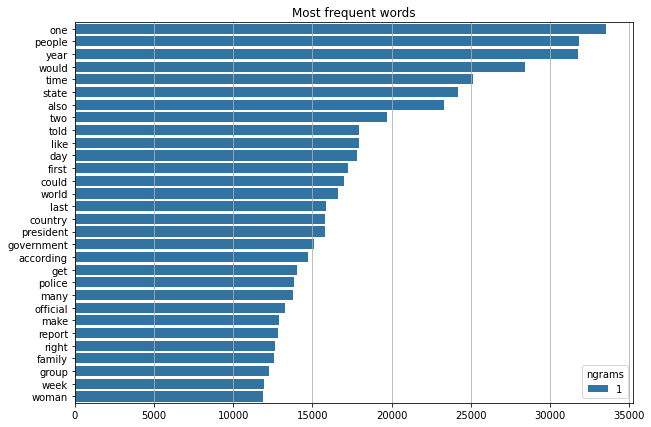

In [27]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [28]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

43002

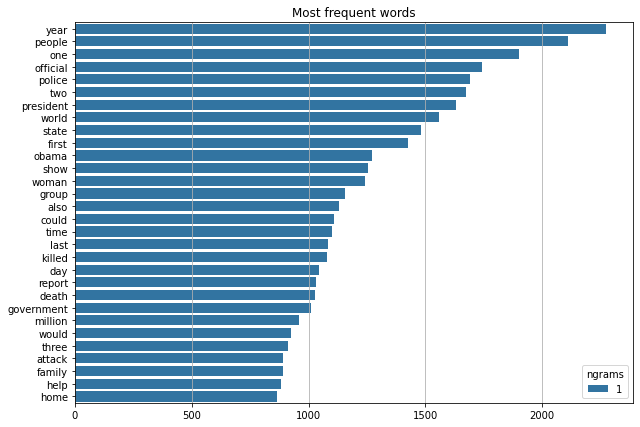

In [29]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["y_clean"], ngrams=[1], top=30, figsize=(10,7))

In [30]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

10246

###### Length analysis

In [31]:
# Texts
X = add_text_length(dtf, "text_clean")

KeyboardInterrupt: 

In [ ]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [ ]:
X_len = 400

In [ ]:
# Summaries
y = add_text_length(dtf, "y_clean")

In [ ]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [ ]:
y_len = 40

###### Summary

In [67]:
dtf = dtf[["text","text_clean","y","y_clean"]]
dtf.head()

,text,text_clean,y,y_clean
0,It's official: U.S. President Barack Obama wan...,official president barack obama wants lawmaker...,Syrian official: Obama climbed to the top of t...,syrian official obama climbed top tree know ge...
1,(CNN) -- Usain Bolt rounded off the world cham...,usain bolt rounded world championships sunday ...,Usain Bolt wins third gold of world championsh...,usain bolt wins third gold world championship ...
2,"Kansas City, Missouri (CNN) -- The General Ser...",kansas city missouri general services administ...,The employee in agency's Kansas City office is...,employee agencys kansas city office among hund...
3,Los Angeles (CNN) -- A medical doctor in Vanco...,los angeles medical doctor vancouver british c...,NEW: A Canadian doctor says she was part of a ...,canadian doctor part team examining harry burk...
4,(CNN) -- Police arrested another teen Thursday...,police arrested another teen thursday sixth su...,Another arrest made in gang rape outside Calif...,another arrest made gang rape outside californ...


### 2 - Preprocessing

In [68]:
# Partitioning
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
dtf_test

,text,text_clean,y,y_clean
0,It's official: U.S. President Barack Obama wan...,official president barack obama wants lawmaker...,Syrian official: Obama climbed to the top of t...,syrian official obama climbed top tree know ge...
1,(CNN) -- Usain Bolt rounded off the world cham...,usain bolt rounded world championships sunday ...,Usain Bolt wins third gold of world championsh...,usain bolt wins third gold world championship ...


### 3 - Baseline (Extractive: TextRank)

In [34]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=y_len/X_len)

In [35]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.18 | rouge2: 0.04 | rougeL: 0.04 --> avg rouge: 0.14


In [36]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [37]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 4 - Model (Abstractive: Seq2Seq)

###### Features Engineering

--- tokenization ---
109749 words
--- padding to sequence ---
99998 sequences of length 400


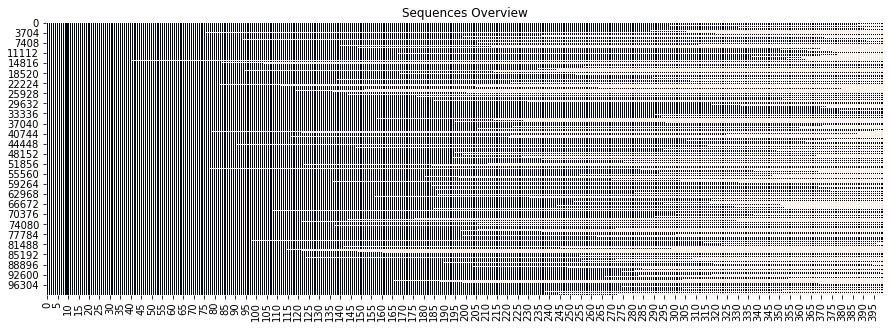

In [69]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [70]:
dict(list(X_dic_vocabulary.items())[0:6])

{'<PAD>': 0, 'years': 1, 'told': 2, 'like': 3, 'first': 4, 'could': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 400


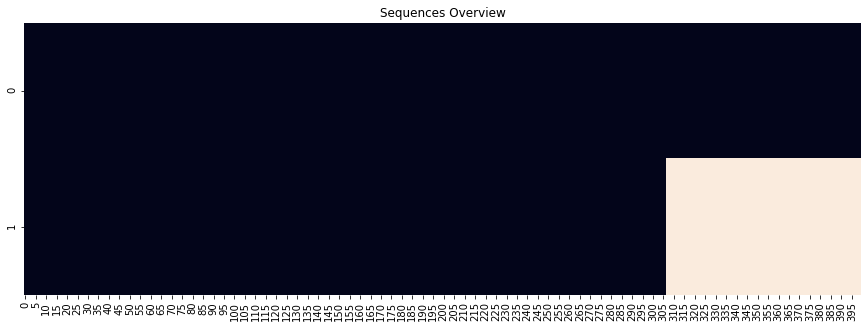

In [71]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [72]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["y_clean"] = dtf_train['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"] = dtf_test['y_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["y_clean"][i]

'<START> usain bolt wins third gold world championship anchors jamaica 4x100m relay victory eighth gold championships bolt jamaica double womens 4x100m relay <END>'

--- tokenization ---
28819 words
--- padding to sequence ---
99998 sequences of length 40


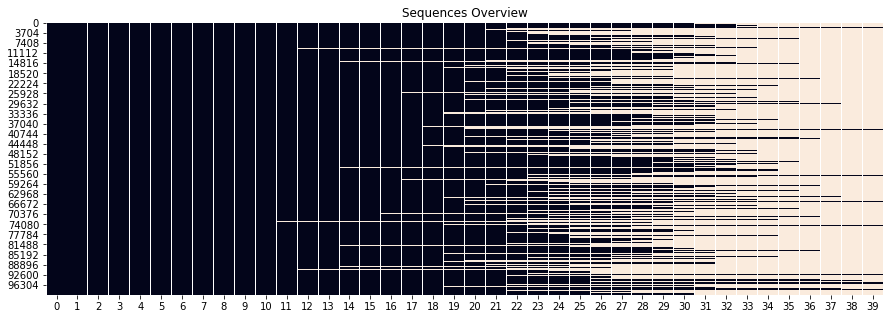

In [73]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["y_clean"], top=y_top_words, maxlen=y_len)

y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [74]:
dict(list(y_dic_vocabulary.items())[0:6])

{'<PAD>': 0, '<START>': 1, '<END>': 2, 'police': 3, 'first': 4, 'president': 5}

--- tokenization ---
--- padding to sequence ---
2 sequences of length 40


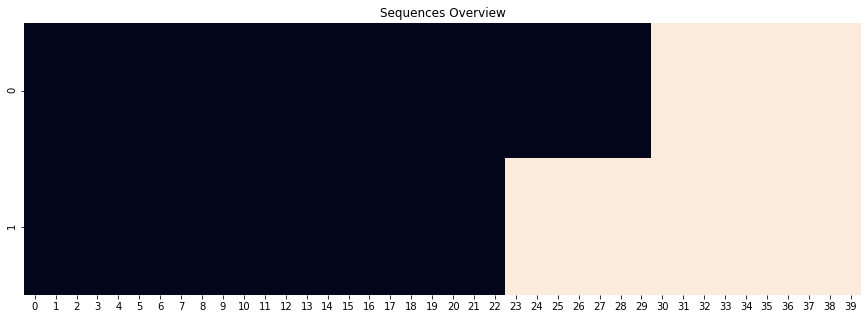

In [75]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["y_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

###### Create Embedding Weights

In [ ]:
# Load pre-trained Word2Vec
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [ ]:
# check nlp model
word = "home"
nlp[word].shape

In [ ]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

In [ ]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

###### Model Design

In [76]:
# Basic Seq2Seq
lstm_units = 250
embeddings_size = 300

##------------ ENCODER (embeddings + lstm) -----------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=len(X_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4, #recurrent_dropout=0.4, 
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embeddings + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=len(y_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4, #recurrent_dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE --------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x_in (InputLayer)               [(None, 400)]        0                                            
__________________________________________________________________________________________________
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
x_emb (Embedding)               (None, 400, 300)     32924700    x_in[0][0]                       
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    8645700     y_in[0][0]                       
____________________________________________________________________________________________

In [ ]:
# Advanced Seq2Seq
lstm_units = 250

##------------ ENCODER (pre-trained embeddings + 3 bi-lstm) ---------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, 
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.2, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (pre-trained embeddings + lstm + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=y_embeddings.shape[0], activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ------------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

model.summary()

###### Train

In [76]:
# This takes a while
model = fit_seq2seq(X_train, y_train, model, build_encoder_decoder=False, 
                    epochs=100, batch_size=64, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=100, batch_size=64)

Epoch 1/100
1058/1094 [============================>.] - ETA: 1:43 - loss: 5.8040 - accuracy: 0.3509

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-37f70a15a991>", line 3, in <module>
    epochs=100, batch_size=64, verbose=1)
  File "/Users/mdp/py/dataScience_ArtificialIntelligence_Utils/natural_language_processing/nlp_utils.py", line 1881, in fit_seq2seq
    callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)])
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", li

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-77-37f70a15a991>", line 3, in <module>
    epochs=100, batch_size=64, verbose=1)
  File "/Users/mdp/py/dataScience_ArtificialIntelligence_Utils/natural_language_processing/nlp_utils.py", line 1881, in fit_seq2seq
    callbacks=[callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)])
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__
    result = self._call(*args, **kwds)
  File "/Users/mdp/opt/anaconda3/envs/env2/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", li

TypeError: object of type 'NoneType' has no len()

###### Test

In [40]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

Model: "Prediction_Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
x_in (InputLayer)            [(None, 400)]             0         
_________________________________________________________________
x_emb (Embedding)            (None, 400, 300)          10263000  
_________________________________________________________________
x_lstm (LSTM)                [(None, 400, 250), (None, 551000    
Total params: 10,814,000
Trainable params: 10,814,000
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

Model: "Prediction_Decoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
y_in (InputLayer)               [(None, None)]       0                                            
__________________________________________________________________________________________________
y_emb (Embedding)               (None, None, 300)    2210700     y_in[0][0]                       
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 250)]        0                                            
_________________________________________________________________________________

In [43]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [44]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

rouge1: 0.0 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.0


In [45]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [46]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

### 5 - Model (Abstractive: Language model)

In [74]:
# Test (no Train)
predicted = bart(corpus=dtf_test["text"], max_len=y_len)

In [75]:
# Evaluate
evaluate_summary(dtf_test["y"][i], predicted[i])

rouge1: 0.57 | rouge2: 0.26 | rougeL: 0.26 --> avg rouge: 0.49


In [76]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [77]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))